Target - Interest Rate

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [21]:
credit_df = pd.read_csv('credit.csv')
credit_df

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.00,36.0
1,12.12,715-719,19200.0,19200.00,36.0
2,21.98,690-694,35000.0,35000.00,60.0
3,9.99,695-699,10000.0,9975.00,36.0
4,11.71,695-699,12000.0,12000.00,36.0
...,...,...,...,...,...
2493,16.77,705-709,30000.0,29950.00,60.0
2494,14.09,740-744,16000.0,16000.00,60.0
2495,13.99,680-684,10000.0,10000.00,36.0
2496,12.42,675-679,6000.0,6000.00,36.0


In [22]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [23]:
# double check for nulls/missing values
credit_df.isna().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [24]:
credit_df.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [25]:
# Convert FICO score to a float and break the columns up
credit_df['fico_low'] = credit_df['fico_range'].str.split('-').str[0].astype(int)
credit_df['fico_high'] = credit_df['fico_range'].str.split('-').str[1].astype(int)

# Get the average of the low and high scores and put those into a new column
credit_df['avg_fico_score'] = (credit_df['fico_low'] + credit_df['fico_high']) /2

# Drop columns I don't need anymore
credit_df.drop(['fico_range', 'fico_low', 'fico_high'], axis=1, inplace=True)


In [ ]:
# Alternative Way
# def get_avg_score(x):
#     scores = x.split("-")
#     val_one = int(scores[0])
#     val_two = int(scores[1]) 
#     return np.mean([val_one, val_two])


In [ ]:
# credit_df['second_fico_avg'] = credit_df['fico_range']. apply(get_avg_score)

In [26]:
credit_df

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,avg_fico_score
0,8.90,20000.0,20000.00,36.0,737.0
1,12.12,19200.0,19200.00,36.0,717.0
2,21.98,35000.0,35000.00,60.0,692.0
3,9.99,10000.0,9975.00,36.0,697.0
4,11.71,12000.0,12000.00,36.0,697.0
...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,707.0
2494,14.09,16000.0,16000.00,60.0,742.0
2495,13.99,10000.0,10000.00,36.0,682.0
2496,12.42,6000.0,6000.00,36.0,677.0


In [27]:
# check again for missing values
credit_df.isnull().sum()

interest_rate                 0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
avg_fico_score                0
dtype: int64

Text(0.5, 0.98, 'Pairplot')

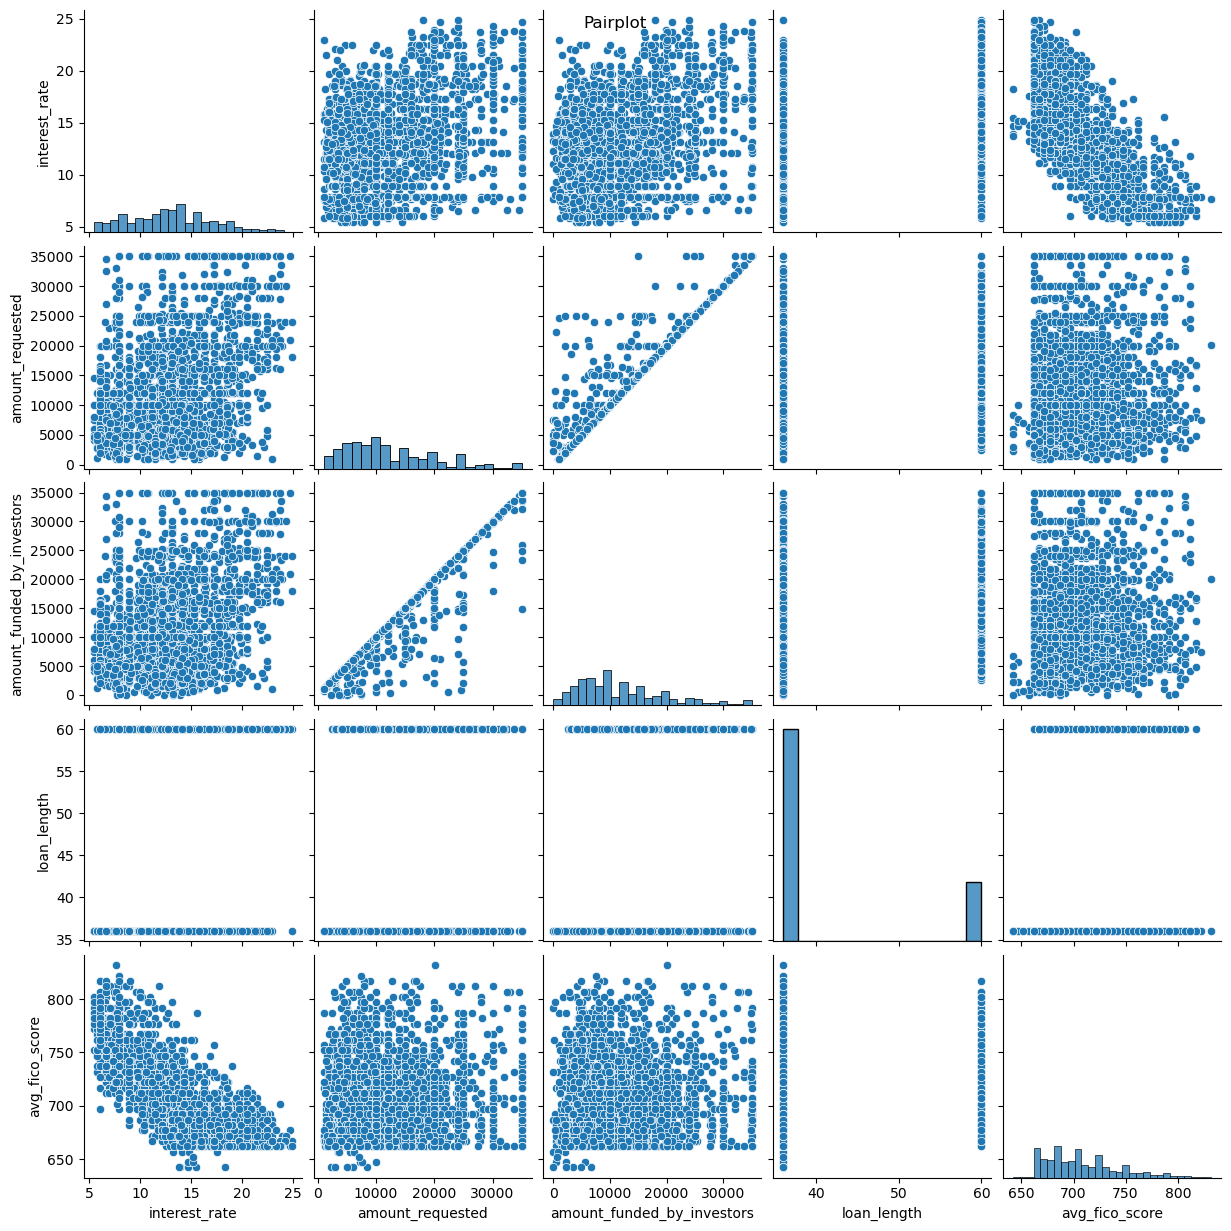

In [9]:
# plots to visualize correlations
sns.pairplot(credit_df)
plt.suptitle('Pairplot')

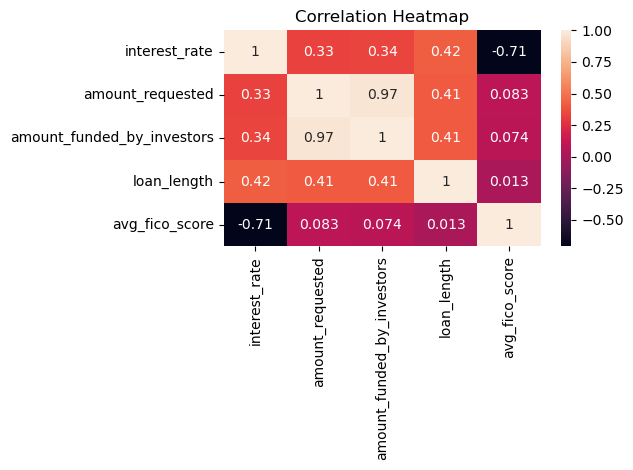

In [10]:
sns.heatmap(credit_df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [28]:
# define features (X) and target (y)
X = credit_df[['avg_fico_score', 'amount_requested', 'loan_length']]
y = credit_df['interest_rate']

In [29]:
# Standardize using scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Split it
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [34]:
# train it
lin_model = LinearRegression()


In [35]:
lin_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# make predictions
y_predict = lin_model.predict(X_test)
y_predict

array([16.03079155,  4.35787883,  5.84651327, 11.04059049,  7.16847959,
       14.1344048 , 10.43592717, 15.58158695, 19.01991519, 13.58716786,
       11.91759648, 13.53942749, 14.07936076,  7.05039817, 17.92170483,
       12.54753701,  9.26992737, 18.322492  , 21.01467281, 15.15378556,
       12.36901415, 13.87582314,  5.50671969, 19.39045946, 12.76385178,
       10.37391799, 11.61501092, 14.06644608, 15.32045369,  9.89174963,
       15.56748741, 12.38039282, 10.06487509, 14.17161283, 14.27677958,
       16.2329307 , 13.83827658, 13.23310546, 11.35387766, 13.97776122,
        2.80128566, 15.06476217, 13.93052865, 20.2027354 , 19.60725029,
       14.5729078 , 15.48712181, 20.41340743, 15.99681219, 22.5609029 ,
       12.28168342, 15.62303925,  4.04883593, 14.91270138, 13.67160846,
       12.28168342, 13.59121113, 11.28558041, 14.07936076, 12.96127059,
        9.91247578,  9.65066545, 14.4470149 , 14.94698754,  9.20502805,
        6.35008485,  9.92250032, 14.27677958,  6.1118908 , 13.48

In [ ]:
# Get r2 to see how well the model is predicting in comparison to true values. 
r2 = r2_score(y_test, y_predict)
r2
# 0.75 r2 meaning predictions match true values fairly well
# Model predicts interest rates with ~75% accuracy based on the factors of credit score, how much to borrow, and loan length


0.7459247835788801

In [ ]:
# Get root mean squared error to get prediction error in same units as target (percent interest rate)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse
# 2% average interest rate prediction error

2.113029228968219

#### Questions:
1. Clearly state the goal of your project (what were you exploring? what scientific question did you ask?)
    - Goal: Help new business owners understand what factors can affect their loan interest rates.
    - Scientific Question: What characteristics most strongly influence the interest rate on a loan?
2. Describe the data.
    - What features (columns) did you have to work with? What features were you interested in?
        - fico_range, amount_requested, amount_funded_by_investors, loan_length, interest_rate
        - Since I was calculating the interest_rate I was mostly interested in fico_range, loan_length, and amount_requested so I decided to focus on these features as I felt they would directly influence credit worthiness.
    - Were the features numerical/categorical/text?
        - All features were numerical except fico_range which was categorical and converted into a numerical value. 
    - Was a lot of data missing or other problems? If so,, what did you do to handle it?
    - How did features relate to each other, and the values that you were interested in? (Include pictures)
3. Clearly state the steps you took to build your model. 